In [1]:
import numpy as np 
import matplotlib.pyplot as plt
from data_processing import *
from report_processing import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
filename="essilor\星趣控样片-外圈（5-11）.csv"

ring_choice="外圈"
# ring_choice="中圈"
# ring_choice="内圈"

In [3]:
data = read_data(filename)
point_per_mm=data.shape[0]/17 # 17mm
mm_per_point=1/point_per_mm

if ring_choice == '内圈':
        image_center=(17/2*point_per_mm,17/2*point_per_mm)
        ring_num=2
elif ring_choice == '中圈':
        image_center=((17/2+11)*point_per_mm,17/2*point_per_mm)
        ring_num=7
elif ring_choice == '外圈':
        image_center=((17/2+16)*point_per_mm,17/2*point_per_mm)
        ring_num=7
else:
        pass 

# ring_num=6

minRadius=(0.8*point_per_mm/2)
maxRadius=(1.5*point_per_mm/2)  
min_area=3.14*minRadius**2/4
max_area=3.14*maxRadius**2/4   
# print(minRadius,maxRadius) 
# print(min_area,max_area)  

binary_image = detect_edge(data,threshold=0.8)
microlenses, microlens_only_image = label_microlens(
binary_image,
min_area=10*10,
)
microlens_params=microlens_centers_radius(microlenses)
sorted_microlens_params=cluster_rings(
        microlens_params,
        image_center=image_center,
        ring_num=ring_num,
        max_ring = ring_num+2,
        threshold=10)

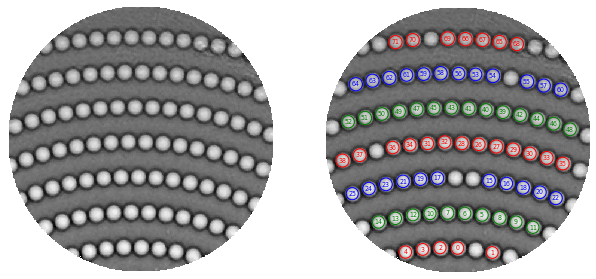

In [4]:
whole_pic_filename=f"{filename.split('.')[0]}_whole.png"
report_whole_picture(sorted_microlens_params, data,whole_pic_filename,dpi=75),
plt.show()

In [5]:
sorted_microlens_params=calculate_each_lens_Rx(data,sorted_microlens_params)
ring_number_list_list=[]
for id, microlens in enumerate(sorted_microlens_params):
    # 根据microlens['ring']的值，将microlens分组
    # 把同一个ring的id 放在一个list里
    ring_number_list_list.append([i for i in range(len(sorted_microlens_params)) if sorted_microlens_params[i]['ring']==microlens['ring']])
# 去掉重复的list
ring_number_list_list = list(set([tuple(t) for t in ring_number_list_list]))
# 按照ring的顺序排序
ring_number_list_list.sort(key=lambda x: sorted_microlens_params[x[0]]['ring'])


In [7]:
sorted_microlens_params[0].keys()

dict_keys(['center', 'radius', 'ring', 'Rx'])

In [ ]:
for ring_number_list in ring_number_list_list:
    mean_list=[]
    std_list=[]

    diameter_list=[0.7,0.5,0.3,0.1]
    for d in diameter_list:
        power_list=[]
        maxpower_list=[]
        for i in ring_number_list:
            measure_radius=d/2*point_per_mm
            power=measure_one_microlens_center_area(i,sorted_microlens_params,data,radius=measure_radius)

            max_power=measure_one_microlens_max(i,sorted_microlens_params,data,radius=measure_radius)

            power_list.append(power)
            maxpower_list.append(max_power)
            # fig.show()

        mean_power=np.mean(power_list)
        std_power=np.std(power_list)
        max_power_mean=np.mean(maxpower_list)
        max_power_std=np.std(maxpower_list)

        mean_list.append(mean_power)
        std_list.append(std_power)
        print(f"{d}, {mean_power:.3f}, {std_power:.3f}") 
    print(f"0.0, {max_power_mean:.3f}, {max_power_std:.3f}")
    print()

0.7, 5.097, 0.080
0.5, 5.704, 0.082
0.3, 6.025, 0.140
0.1, 6.144, 0.196
0.0, 6.260, 0.234

0.7, 4.789, 0.102
0.5, 5.388, 0.120
0.3, 5.705, 0.159
0.1, 5.812, 0.235
0.0, 5.930, 0.236

0.7, 4.482, 0.122
0.5, 5.052, 0.136
0.3, 5.395, 0.140
0.1, 5.542, 0.128
0.0, 5.626, 0.170

0.7, 4.166, 0.084
0.5, 4.693, 0.094
0.3, 4.975, 0.109
0.1, 5.085, 0.159
0.0, 5.177, 0.160

0.7, 3.904, 0.080
0.5, 4.417, 0.092
0.3, 4.694, 0.075
0.1, 4.814, 0.108
0.0, 4.922, 0.129

0.7, 3.556, 0.086
0.5, 4.062, 0.079
0.3, 4.437, 0.112
0.1, 4.664, 0.240
0.0, 4.768, 0.218

0.7, 3.230, 0.048
0.5, 3.668, 0.072
0.3, 4.048, 0.071
0.1, 4.306, 0.205
0.0, 4.407, 0.237

